# Import necessary library

In [97]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Flatten,Conv2D,MaxPooling2D

# Import dataset from keras dataset

In [5]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

# Explor data analysis

In [37]:
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(60000, 28, 28)

In [43]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [36]:
y_train[3]

1

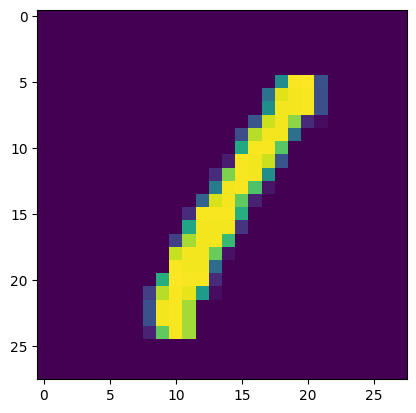

In [35]:
plt.imshow(x_train[3])

# Normilaze datases 

In [74]:
x_train = x_train/255
x_test  = x_test/255

In [76]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Model Bulid

In [101]:
# Define the model
model = Sequential([
    #cnn
    Input(shape=(28,28,1)),
    Conv2D(filters=32,kernel_size=(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(filters=32,kernel_size=(3,3),activation="relu"),
    MaxPooling2D((2,2)),

    Flatten(),  # Flatten the 2D image into 1D
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(10, activation="softmax")  # Softmax for multi-class classification
])

In [102]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  
    metrics=["accuracy"]
)

In [103]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.8652 - loss: 0.4188
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9837 - loss: 0.0540
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9882 - loss: 0.0374
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9916 - loss: 0.0282
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9941 - loss: 0.0203
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9943 - loss: 0.0182
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9953 - loss: 0.0147
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.9957 - loss: 0.0137
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9965 - loss: 0.0102
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9966 - loss: 0.0100


# Model Prdection

In [104]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [105]:
y_pred

array([[2.2327919e-11, 2.1790298e-07, 5.9790630e-09, ..., 9.9998796e-01,
        8.7367624e-10, 1.1240095e-05],
       [1.1078480e-09, 4.0168361e-06, 9.9999559e-01, ..., 3.7296891e-07,
        3.4041967e-08, 1.7901335e-11],
       [1.6262403e-08, 9.9999821e-01, 2.7021261e-07, ..., 8.4640831e-08,
        1.0942255e-06, 3.6546707e-10],
       ...,
       [2.9954851e-11, 2.7431999e-09, 8.5916056e-09, ..., 2.1096158e-09,
        8.1002138e-09, 3.0587026e-07],
       [4.2706793e-11, 4.5153689e-10, 6.8453901e-13, ..., 3.0714698e-11,
        7.3810249e-08, 2.7051426e-09],
       [6.2281869e-09, 3.1042040e-07, 1.0340638e-06, ..., 3.4876341e-11,
        1.3630066e-06, 2.5172266e-09]], dtype=float32)

In [106]:
y_pred_label =[np.argmax(i) for i in y_pred]

In [107]:
y_pred_label[0]

7

In [108]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    0,    0,    0,    0,    1,    1,    1,    3],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,    0, 1018,    2,    0,    0,    0,    9,    2,    0],
       [   0,    0,    0, 1007,    0,    2,    0,    0,    1,    0],
       [   0,    0,    0,    1,  964,    0,    4,    0,    3,   10],
       [   1,    0,    0,    6,    0,  884,    1,    0,    0,    0],
       [   3,    4,    0,    0,    1,    3,  947,    0,    0,    0],
       [   0,    2,    0,    2,    1,    0,    0, 1019,    1,    3],
       [   2,    0,    2,    2,    0,    3,    0,    0,  963,    2],
       [   0,    0,    0,    1,    3,    3,    0,    1,    1, 1000]])>

Text(0.5, 1.0, 'HandWritten digit classification')

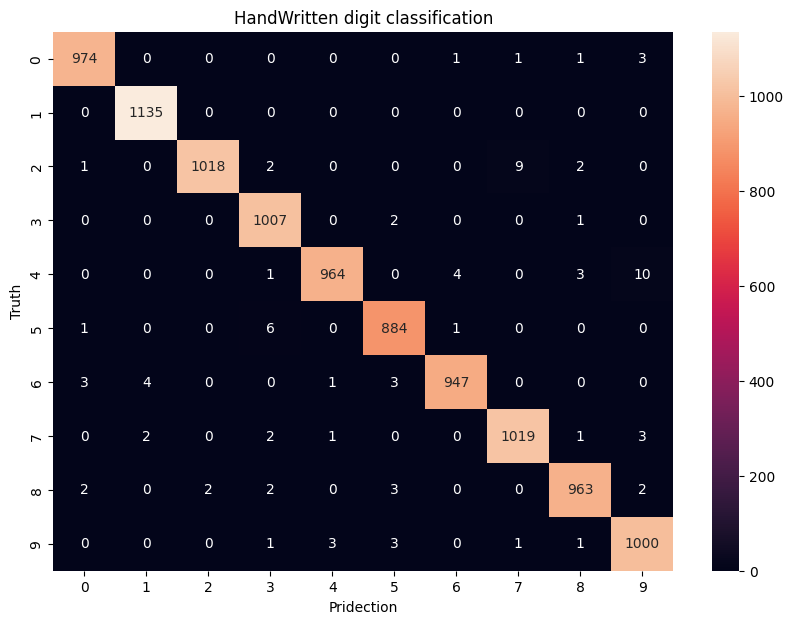

In [109]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Pridection")
plt.ylabel("Truth")
plt.title("HandWritten digit classification")